In [150]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, plot_confusion_matrix
import pickle

In [2]:
data = pd.read_csv("E:\github\Lung-Cancer-detection\Dataset\lung_cancer.csv")
data.head()

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic_Disease,Fatigue,Allergy,Wheezing,Alcohol_Consume,Coughing,Shortness_Of_Breath,Swallowing_Difficulty,Chest_Pain,Output
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
data = data.replace([1],'0')
data= data.replace([2],'1')
data.head()

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic_Disease,Fatigue,Allergy,Wheezing,Alcohol_Consume,Coughing,Shortness_Of_Breath,Swallowing_Difficulty,Chest_Pain,Output
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [4]:
#understand the data
data.isnull().sum()

Gender                   0
Age                      0
Smoking                  0
Yellow_Fingers           0
Anxiety                  0
Peer_Pressure            0
Chronic_Disease          0
Fatigue                  0
Allergy                  0
Wheezing                 0
Alcohol_Consume          0
Coughing                 0
Shortness_Of_Breath      0
Swallowing_Difficulty    0
Chest_Pain               0
Output                   0
dtype: int64

In [5]:
data.columns

Index(['Gender', 'Age', 'Smoking', 'Yellow_Fingers', 'Anxiety',
       'Peer_Pressure', 'Chronic_Disease', 'Fatigue', 'Allergy ', 'Wheezing',
       'Alcohol_Consume', 'Coughing', 'Shortness_Of_Breath',
       'Swallowing_Difficulty', 'Chest_Pain', 'Output'],
      dtype='object')

In [6]:
data.shape

(309, 16)

In [20]:
# handling categorical data
cat_data = pd.get_dummies(data['Gender'], drop_first=True)
new_data = pd.concat([data,cat_data], axis=1)
new_data = new_data.drop("Gender",axis=1)
new_data.rename(columns = {'M':'Gender'}, inplace = True)
new_data


,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic_Disease,Fatigue,Allergy,Wheezing,Alcohol_Consume,Coughing,Shortness_Of_Breath,Swallowing_Difficulty,Chest_Pain,Output,Gender
0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES,1
1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES,1
2,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO,0
3,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO,1
4,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,0,0,0,1,1,1,0,0,1,1,1,1,0,YES,0
305,70,1,0,0,0,0,1,1,1,1,1,1,0,1,YES,1
306,58,1,0,0,0,0,0,1,1,1,1,0,0,1,YES,1
307,67,1,0,1,0,0,1,1,0,1,1,1,0,1,YES,1


In [8]:
#features
features = new_data.drop("Output", axis=1)
target = new_data["Output"]
print("------------FEATURES---------------")
features.head()


------------FEATURES---------------


,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic_Disease,Fatigue,Allergy,Wheezing,Alcohol_Consume,Coughing,Shortness_Of_Breath,Swallowing_Difficulty,Chest_Pain,Gender
0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,63,1,1,1,0,0,0,0,0,1,0,0,1,1,1
4,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [9]:
#target
print("-------------TARGET-------------")
target.head()

-------------TARGET-------------


0    YES
1    YES
2     NO
3     NO
4     NO
Name: Output, dtype: object

In [87]:
# feature scaling
scaler = MinMaxScaler()
new_features = scaler.fit_transform(features)
print(new_features)

[[0.72727273 0.         1.         ... 1.         1.         1.        ]
 [0.8030303  1.         0.         ... 1.         1.         1.        ]
 [0.57575758 0.         0.         ... 0.         1.         0.        ]
 ...
 [0.56060606 1.         0.         ... 0.         1.         1.        ]
 [0.6969697  1.         0.         ... 0.         1.         1.        ]
 [0.62121212 0.         0.         ... 1.         0.         1.        ]]


In [142]:
# model & fit
x_train, x_test, y_train, y_test = train_test_split(new_features,target,random_state=50)

In [148]:
#________________________ DECISION TREE __________________________#

model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
cr = classification_report(y_test,y_pred)
print("-------------------CLASSIFICATION REPORT--------------------")
print(cr)

-------------------CLASSIFICATION REPORT--------------------
              precision    recall  f1-score   support

          NO       0.73      0.89      0.80         9
         YES       0.99      0.96      0.97        69

    accuracy                           0.95        78
   macro avg       0.86      0.92      0.89        78
weighted avg       0.96      0.95      0.95        78



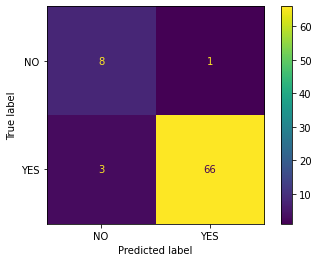

In [149]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [152]:
# predictions using Decision Tree
age = int(input("Enter age: "))
smoke = input("0-No/1-Yes: ")
yf = input("0-No/1-Yes: ")
anxiety = input("0-No/1-Yes: ")
pp = input("0-No/1-Yes: ")
cd= input("0-No/1-Yes: ")
f = input("0-No/1-Yes: ")
allergy = input("0-No/1-Yes: ")
w = input("0-No/1-Yes: ")
ac = input("0-No/1-Yes: ")
c = input("0-No/1-Yes: ")
sob = input("0-No/1-Yes: ")
sd = input("0-No/1-Yes: ")
cp = input("0-No/1-Yes: ")
gen = input("0-Female/1-Male: ")

d = [[age,smoke,yf,anxiety,pp,cd,f,allergy,w,ac,c,sob,sd,cp,gen]]
t_d = scaler.transform(d)
print("Prediction: ", model.predict(t_d))

Prediction:  ['YES']


In [92]:
#________________________ RANDOM FOREST TREE __________________________#

model1 = RandomForestClassifier()
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
cr = classification_report(y_test,y_pred)
print("-------------------CLASSIFICATION REPORT--------------------")
print(cr)

-------------------CLASSIFICATION REPORT--------------------
              precision    recall  f1-score   support

          NO       0.67      0.44      0.53         9
         YES       0.93      0.97      0.95        69

    accuracy                           0.91        78
   macro avg       0.80      0.71      0.74        78
weighted avg       0.90      0.91      0.90        78



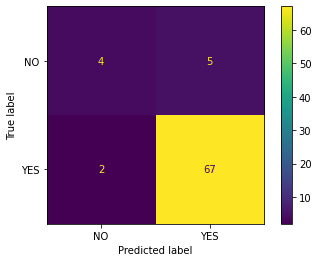

In [93]:
plot_confusion_matrix(model1,x_test,y_test)
plt.show()

In [95]:
#________________________ LOGISTIC REGRESSION __________________________#

model2 = LogisticRegression()
model2.fit(x_train,y_train)
y_pred = model2.predict(x_test)
cr = classification_report(y_test,y_pred)
print("-------------------CLASSIFICATION REPORT--------------------")
print(cr)

-------------------CLASSIFICATION REPORT--------------------
              precision    recall  f1-score   support

          NO       0.62      0.56      0.59         9
         YES       0.94      0.96      0.95        69

    accuracy                           0.91        78
   macro avg       0.78      0.76      0.77        78
weighted avg       0.91      0.91      0.91        78



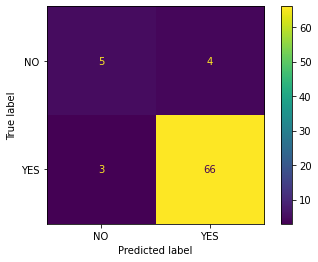

In [96]:
plot_confusion_matrix(model2,x_test,y_test)
plt.show()

In [151]:
#save the model
with open('db.model', 'wb') as f:
	pickle.dump(model,f)